In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [2]:
import re

In [3]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [4]:
#remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

#remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

#lower all characters
sentences = sentences.lower()

In [5]:
words = sentences.split()
vocab = set(words)

In [6]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [7]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [8]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i-2],words[i-1],words[i+1],words[i+2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [9]:
embeddings = np.random.random_sample((vocab_size, embed_dim))

In [10]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [11]:
def log_softmax(x):
    e_x = np.exp(x-np.max(x))
    return np.log(e_x / e_x.sum())

In [12]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [13]:
def log_softmax_crossentropy_with_logits(logits, target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)), target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims = True)
    
    return (-out + softmax) / logits.shape[0]

In [15]:

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m,n,o

In [16]:
#backward Function
def backwards(preds, theta, target_idxs):
    m,n,o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

In [17]:
#Optimize function

def optimize(theta, grad, lr = 0.03):
    theta -= grad * lr
    return theta

In [18]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [19]:
epoch_losses = {}

for epoch in range(80):
    
    losses = []
    
    for context, target in data: 
            context_idxs = np.array([word_to_ix[w] for w in context])
            preds = forward(context_idxs, theta)
            
            target_idxs = np.array([word_to_ix[target]])
            loss = NLLLoss(preds[-1], target_idxs)
            
            losses.append(loss)
            
            grad = backwards(preds, theta, target_idxs)
            theta = optimize(theta, grad, lr = 0.03)
            
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

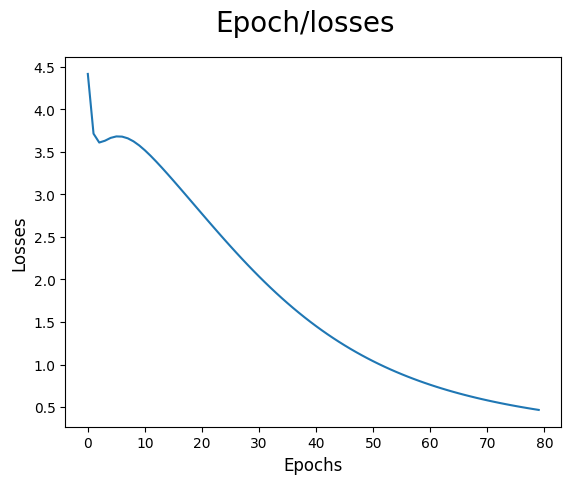

In [20]:
#Analyze
#post loss/epoch

ix = np.arange(0, 80)

fig = plt.figure()
fig.suptitle('Epoch/losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Losses', fontsize = 12)

In [21]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [22]:
predict(['we', 'are', 'to', 'study'])

'about'

In [23]:
#accuracy

def accuracy():
    wrong = 0
    
    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [24]:
accuracy()

1.0

In [25]:
predict(['processes', 'manipulate', 'things', 'study'])

'processes'